In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [177]:
df = pd.read_csv(r"C:\Users\user\Downloads\Dataset\monthly-car-sales-1960.csv")

In [178]:
df.head()

,Month,Monthly car sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


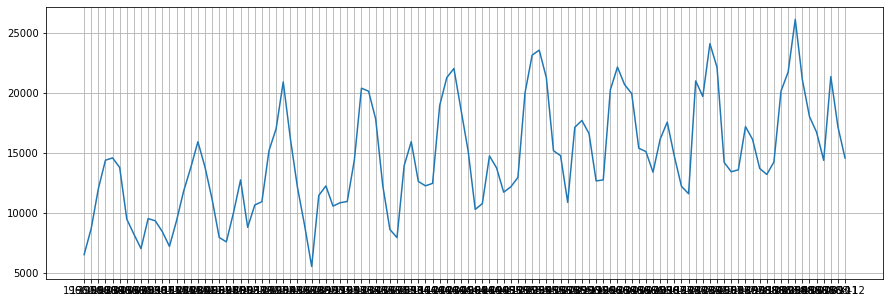

In [179]:
plt.figure(figsize=(15,5))
plt.plot(df["Month"], df["Monthly car sales"])
#sns.lineplot(x = "Month", y = "Monthly car sales", data = df,)
plt.grid()

# Insights : X-axis is not looking good.
Because of Column month is an object format. needs to change it in datetime format.


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              108 non-null    object
 1   Monthly car sales  108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [181]:
df_1 = df.copy()
df_1["Month"] = pd.to_datetime(df_1["Month"], format = '%Y-%m')

In [182]:
df_1.head()

,Month,Monthly car sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [183]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              108 non-null    datetime64[ns]
 1   Monthly car sales  108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


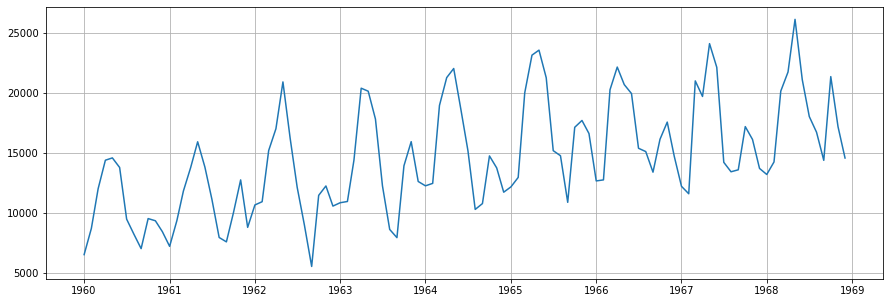

In [184]:
plt.figure(figsize=(15,5))
plt.plot(df_1["Month"], df_1["Monthly car sales"])
plt.grid()

# Replace any missing and 0 value.
1st find where is the Missing value.<br>
2nd convert it as na value.<br>
fill it by forward fill, backword fill, mean value, median value.

In [185]:
df_2 = df_1.copy()
df_2[df_2["Monthly car sales"]<6000]

,Month,Monthly car sales
32,1962-09-01,5568


# Insights : I Want to change this value.

In [186]:
df_2["Monthly car sales"] = np.where(df_2['Monthly car sales'] ==5568, np.nan, df_2['Monthly car sales'])

In [187]:
df_2.isnull().sum()

Month                0
Monthly car sales    1
dtype: int64

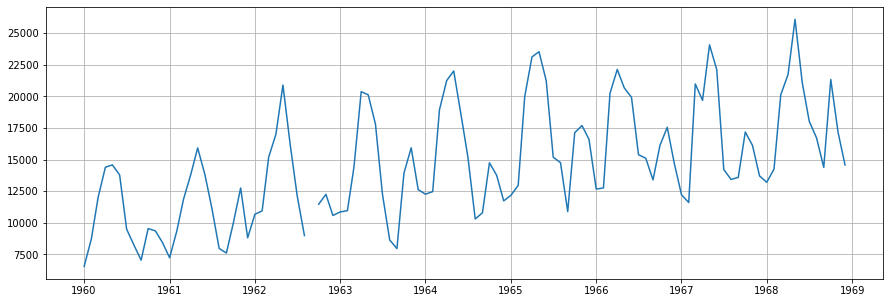

In [188]:
plt.figure(figsize=(15,5))
plt.plot(df_2["Month"], df_2["Monthly car sales"])
plt.grid()

# Insights : In the above plot we can see there is an nan value.

In [189]:
df_2['Monthly car sales'] = df_2['Monthly car sales'].fillna(method = 'ffill')

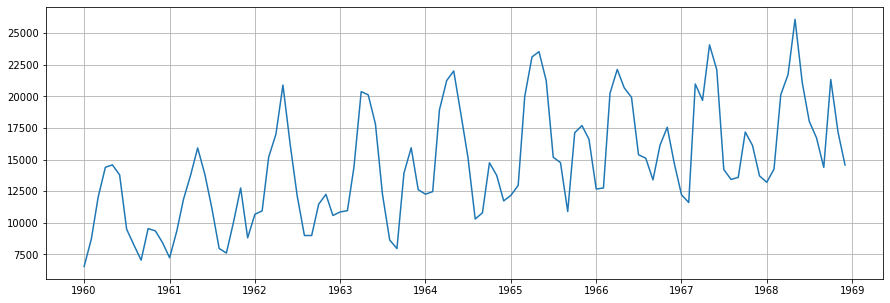

In [190]:
plt.figure(figsize=(15,5))
plt.plot(df_2["Month"], df_2["Monthly car sales"])
plt.grid()

# Insights : Using ffill method(fill previous month value)  fill the value of na.

# Rolling Mean!!

In [191]:
df_3 = df_2.copy()
df_3["roll_mean"] = df_3['Monthly car sales'].rolling(window = 6).mean()
df_3["roll_stdv"] = df_3['Monthly car sales'].rolling(window = 6).std()
df_3["rollmean + 1st_stdv"] = df_3["roll_mean"] + df_3["roll_stdv"]
df_3["rollmean - 1st_stdv"] = df_3["roll_mean"] - df_3["roll_stdv"]
df_3.head()

,Month,Monthly car sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv
0,1960-01-01,6550.0,NaN,NaN,NaN,NaN
1,1960-02-01,8728.0,NaN,NaN,NaN,NaN
2,1960-03-01,12026.0,NaN,NaN,NaN,NaN
3,1960-04-01,14395.0,NaN,NaN,NaN,NaN
4,1960-05-01,14587.0,NaN,NaN,NaN,NaN


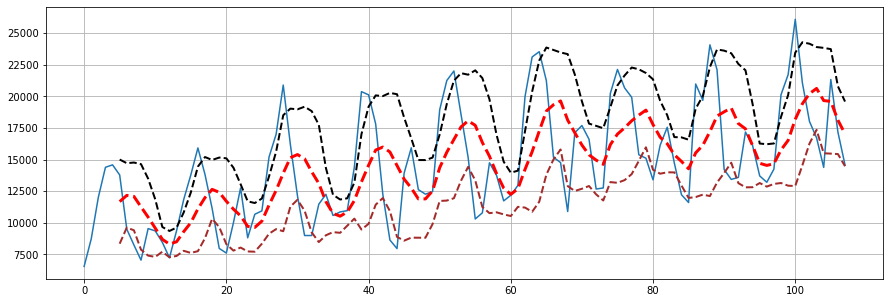

In [192]:
plt.figure(figsize=(15,5))
plt.plot(df_3["Monthly car sales"])
plt.plot(df_3["roll_mean"], color = 'red', ls = '--', lw=3)
plt.plot(df_3["rollmean + 1st_stdv"], color= 'black', ls = '--', lw=2)
plt.plot(df_3["rollmean - 1st_stdv"], color = 'brown', ls = '--', lw=2)
plt.grid()

In [193]:
# Make Month columns as index
#df_3 = df_3.set_index("Month")
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month                108 non-null    datetime64[ns]
 1   Monthly car sales    108 non-null    float64       
 2   roll_mean            103 non-null    float64       
 3   roll_stdv            103 non-null    float64       
 4   rollmean + 1st_stdv  103 non-null    float64       
 5   rollmean - 1st_stdv  103 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 5.2 KB


# Lets Break the Data Points


In [194]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Model

In [195]:
#By defqult model is additive but we can change it if required into multiplicative.
decomposition = seasonal_decompose(df_3["Monthly car sales"], period=1)

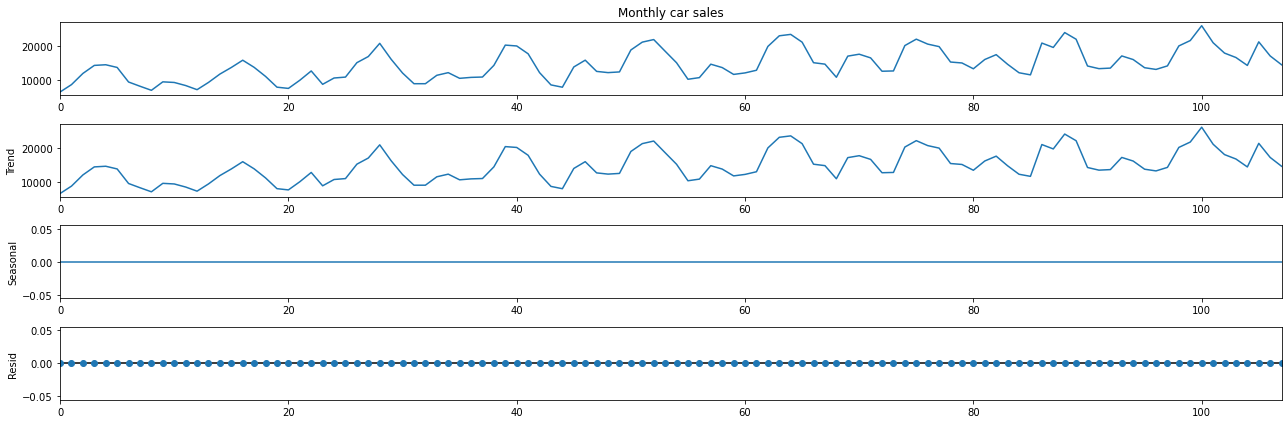

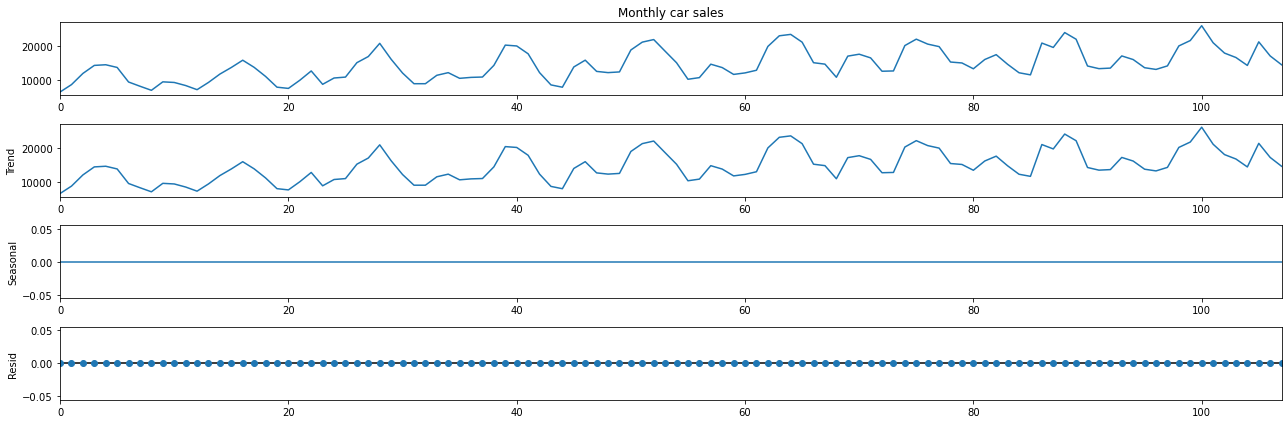

In [196]:
decomposition.plot()

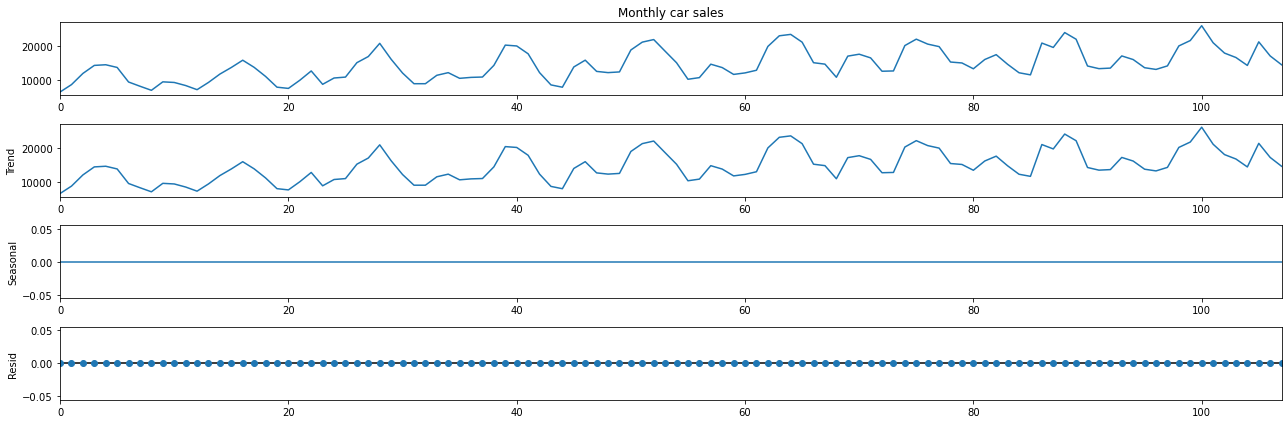

In [197]:
#another Way
from pylab import rcParams
rcParams['figure.figsize'] = 18,6
decomposition.plot()
plt.show()

# Multiplicative Model

In [198]:
decomposition = seasonal_decompose(df_3["Monthly car sales"], period=1, model='multiplicative')

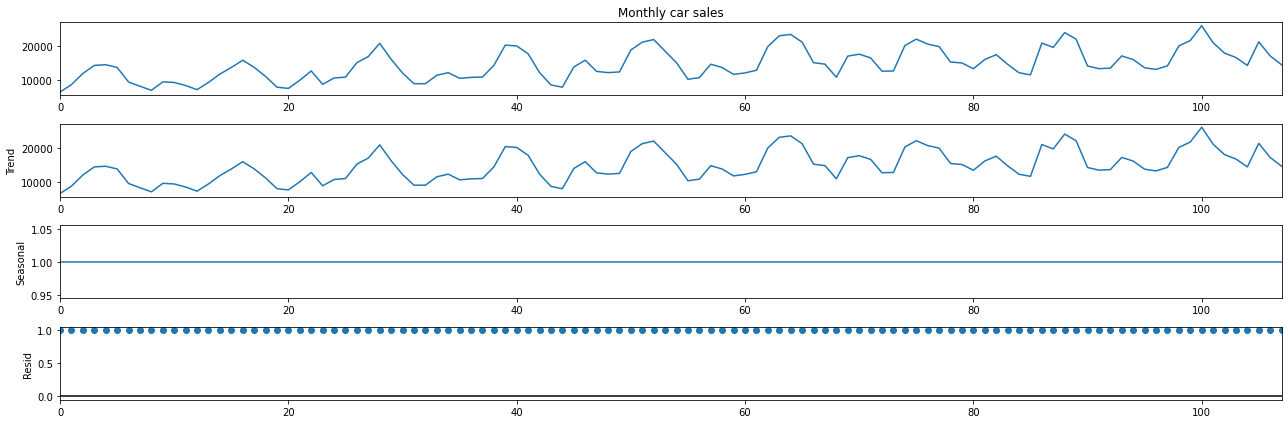

In [199]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,6
decomposition.plot()
plt.show()

In [200]:
df_3["Trend"] = decomposition.trend
df_3["Seasonal"] = decomposition.seasonal
df_3["Error"] = decomposition.resid

In [201]:
df_3.head()

,Month,Monthly car sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error
0,1960-01-01,6550.0,NaN,NaN,NaN,NaN,6550.0,1.0,1.0
1,1960-02-01,8728.0,NaN,NaN,NaN,NaN,8728.0,1.0,1.0
2,1960-03-01,12026.0,NaN,NaN,NaN,NaN,12026.0,1.0,1.0
3,1960-04-01,14395.0,NaN,NaN,NaN,NaN,14395.0,1.0,1.0
4,1960-05-01,14587.0,NaN,NaN,NaN,NaN,14587.0,1.0,1.0


In [202]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month                108 non-null    datetime64[ns]
 1   Monthly car sales    108 non-null    float64       
 2   roll_mean            103 non-null    float64       
 3   roll_stdv            103 non-null    float64       
 4   rollmean + 1st_stdv  103 non-null    float64       
 5   rollmean - 1st_stdv  103 non-null    float64       
 6   Trend                108 non-null    float64       
 7   Seasonal             108 non-null    float64       
 8   Error                108 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.7 KB


In [203]:
df_3 = df_3.set_index("Month")

In [204]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-01 to 1968-12-01
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Monthly car sales    108 non-null    float64
 1   roll_mean            103 non-null    float64
 2   roll_stdv            103 non-null    float64
 3   rollmean + 1st_stdv  103 non-null    float64
 4   rollmean - 1st_stdv  103 non-null    float64
 5   Trend                108 non-null    float64
 6   Seasonal             108 non-null    float64
 7   Error                108 non-null    float64
dtypes: float64(8)
memory usage: 7.6 KB


In [205]:
# check for a month
df_3[df_3.index == "1966-01-01"]

,Monthly car sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error
Month,,,,,,,,
1966-01-01,12674.0,14962.333333,2709.727194,17672.060527,12252.606139,12674.0,1.0,1.0


In [206]:
df_4 = df_3.copy()
df_4 = df_4.rename(columns = {"Monthly car sales":"Sales"})
df_4.head()

,Sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error
Month,,,,,,,,
1960-01-01,6550.0,NaN,NaN,NaN,NaN,6550.0,1.0,1.0
1960-02-01,8728.0,NaN,NaN,NaN,NaN,8728.0,1.0,1.0
1960-03-01,12026.0,NaN,NaN,NaN,NaN,12026.0,1.0,1.0
1960-04-01,14395.0,NaN,NaN,NaN,NaN,14395.0,1.0,1.0
1960-05-01,14587.0,NaN,NaN,NaN,NaN,14587.0,1.0,1.0


In [207]:
train = df_4[(df_4.index >="1960-01-01") & (df_4.index<="1967-06-01")]
test = df_4[(df_4.index >="1967-07-01")]

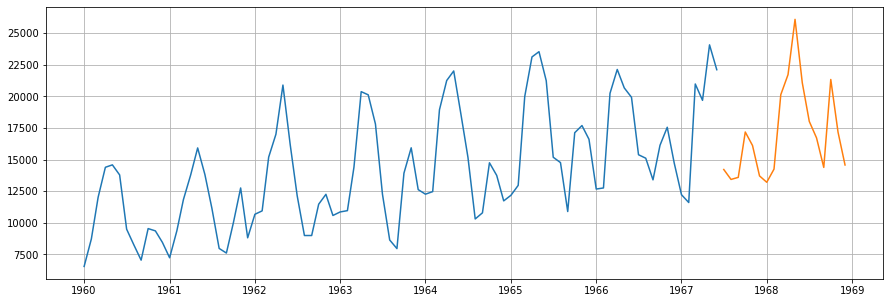

In [208]:
plt.figure(figsize=(15,5))
plt.plot(train["Sales"])
plt.plot(test["Sales"])
plt.grid()

# Model -1 : Simple Average

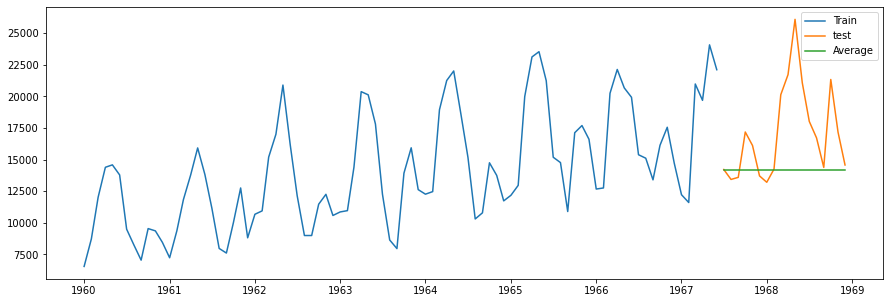

In [209]:
test_1 = test.copy()
test_1["avg"] = train["Sales"].mean()
plt.figure(figsize=(15,5))
plt.plot(train["Sales"], label="Train")
plt.plot(test["Sales"], label="test")
plt.plot(test_1["avg"], label = "Average")
plt.legend(loc='best')

In [210]:
train["Sales"].mean(), test["Sales"].mean()


(14141.022222222222, 17056.055555555555)

In [211]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [212]:
rms = sqrt(mean_squared_error(test.Sales, test_1.avg))
print(rms)

4611.712919683992


# Model - 2 : Moving Average ( Rolling Average )

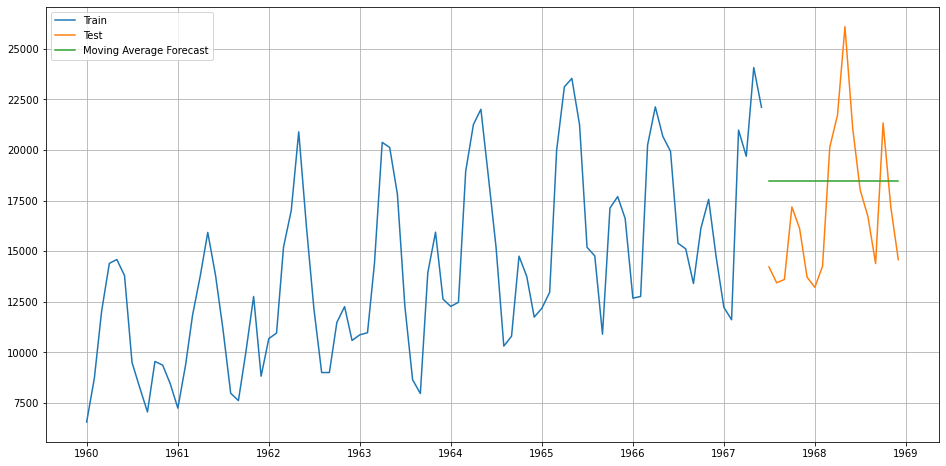

In [213]:
test_2 = test.copy()
# iloc[-1] it will take the last value of the mean
test_2['moving_avg'] = train['Sales'].rolling(6).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test_2['moving_avg'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.grid()

In [215]:
rmse = sqrt(mean_squared_error(test.Sales, test_2.moving_avg))
print(rmse)

3836.1284869668425


In [216]:
test_2.head()

,Sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error,moving_avg
Month,,,,,,,,,
1967-07-01,14220.0,18783.333333,4840.269483,23623.602816,13943.063850,14220.0,1.0,1.0,18450.833333
1967-08-01,13434.0,19087.666667,4329.325336,23416.992003,14758.341330,13434.0,1.0,1.0,18450.833333
1967-09-01,13598.0,17856.500000,4715.023383,22571.523383,13141.476617,13598.0,1.0,1.0,18450.833333
1967-10-01,17187.0,17439.000000,4630.130884,22069.130884,12808.869116,17187.0,1.0,1.0,18450.833333
1967-11-01,16119.0,16112.000000,3293.970917,19405.970917,12818.029083,16119.0,1.0,1.0,18450.833333


# Model - 3 : Simple Exponential Smoothing

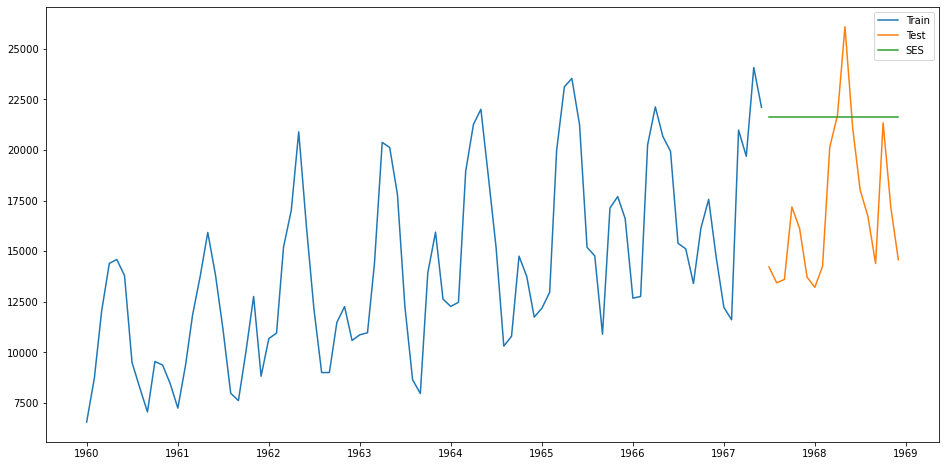

In [217]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
test_3 = test.copy()
# 0.6 means it give 60% weight for its nearest point
SE = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level=0.5,optimized=False)
test_3['SES'] = SE.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
#plt.plot(SE.fittedvalues, color='black', ls="--")
plt.plot(test['Sales'], label='Test')
plt.plot(test_3['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [218]:
rmse = sqrt(mean_squared_error(test.Sales, test_3.SES))
print(rmse)

5818.868753112319


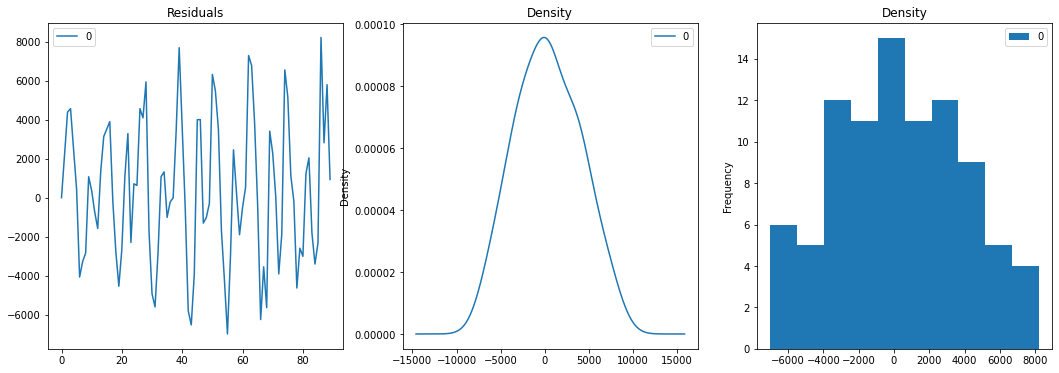

In [219]:
# Plot residual error
residuals = pd.DataFrame(SE.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])     
# Density should be normally distributed
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

# Insights : Residuals should be normally Distributed.

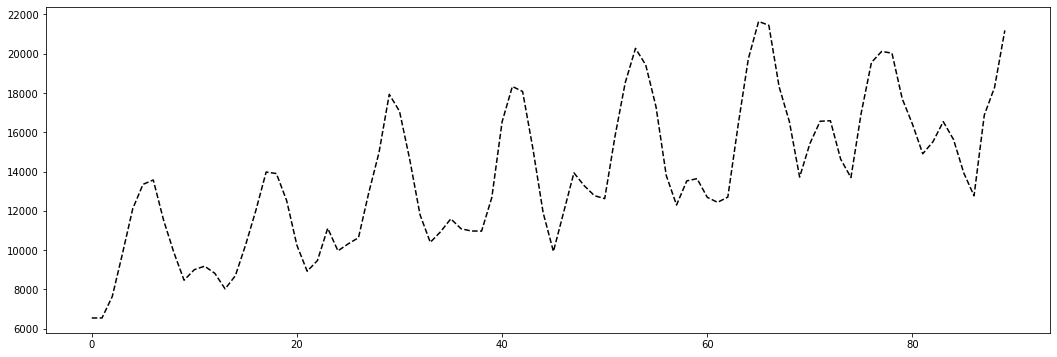

In [220]:
plt.plot(SE.fittedvalues, color='black', ls="--")

# Model - 4 : Holt Linear Method
It Consider trend in the data.

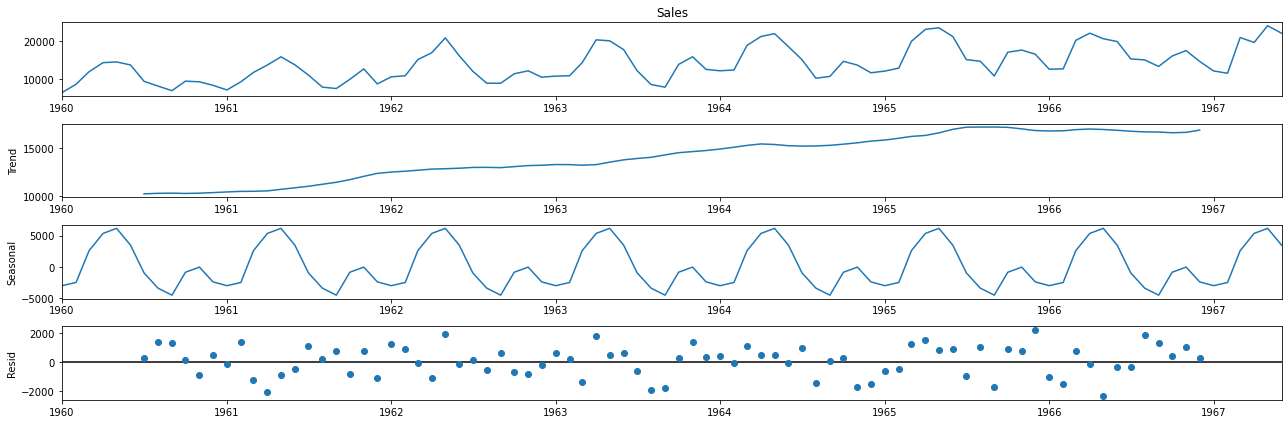

In [221]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Sales).plot()
result = sm.tsa.stattools.adfuller(train.Sales)
plt.show()

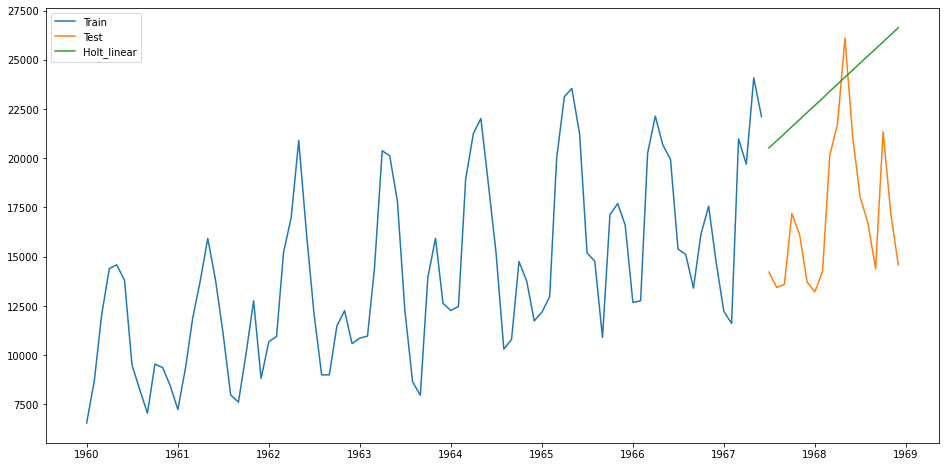

In [222]:
test_4 = test.copy()

fit1 = Holt(np.asarray(train['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
test_4['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test_4['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [223]:
rms = sqrt(mean_squared_error(test.Sales, test_4.Holt_linear))
print(rms)

7341.0898084332575


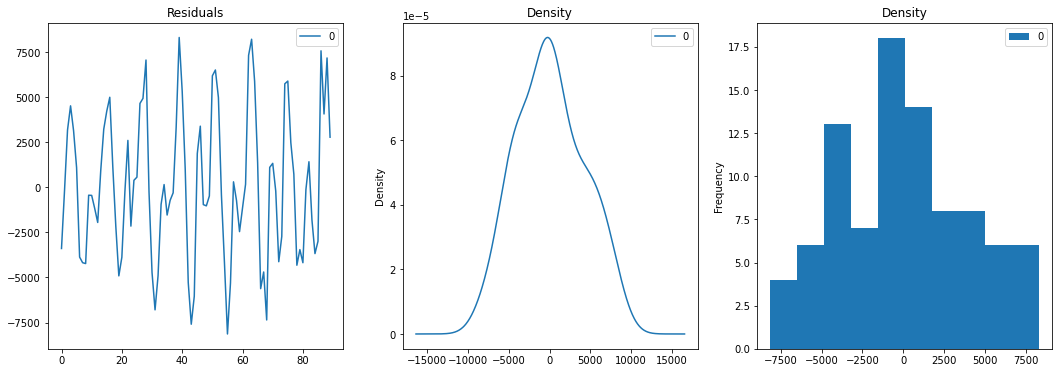

In [224]:
# Plot residual error
residuals = pd.DataFrame(fit1.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

# Model - 5 : Holt Winter
This method use both Trend and Seasonal part.

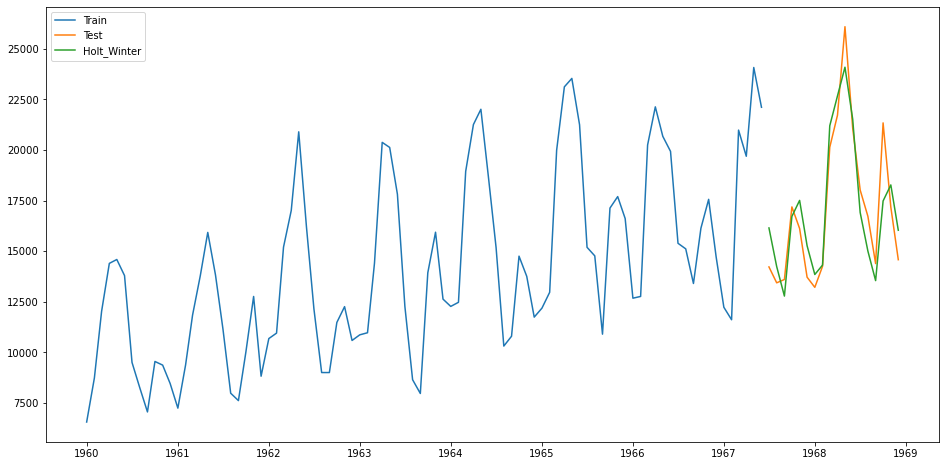

In [225]:
test_5 = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
test_5['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test_5['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [226]:
rmse = sqrt(mean_squared_error(test.Sales, test_5.Holt_Winter))
print(rmse)

1479.2283579947152


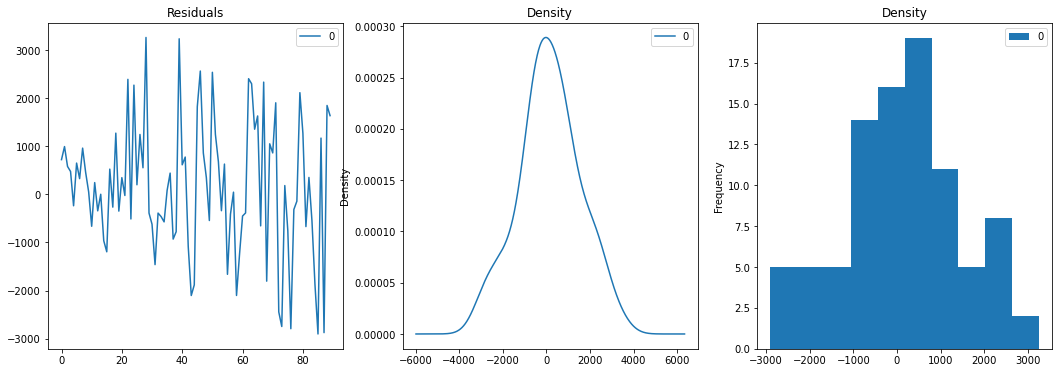

In [227]:
# Plot residual error
residuals = pd.DataFrame(fit1.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

# Model - 6 : ARIMA
AR = AutoRegressive(p)<br>
I  = Intregrative(d)<br>
MA = Moving Average(q) <br>
by takeing p,d,q = o


In [228]:
from statsmodels.tsa.api import ARIMA

In [229]:
test_6 = test.copy()
arima = ARIMA(train["Sales"], order=(0,0,0))
arima = arima.fit()
test_6["ARIMA"] = arima.forecast(steps = len(test))[0]
# this forecast give 3 array (forecast value, Std, Confidence Interval)
#arima.forecast(steps = len(test))

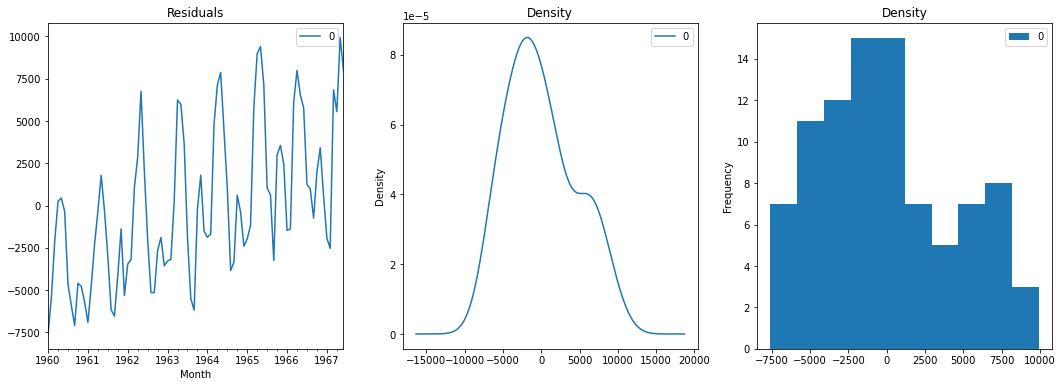

In [230]:
# Plot Residual Error
residuals = pd.DataFrame(arima.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

In [231]:
rmse = sqrt(mean_squared_error(test.Sales, test_6.ARIMA))
print(rmse)

4611.712919683992


# Insights : This Model works as Simple Average.
If we take p,d,q = 0 then ARIMA works as Simple Average.
 

In [232]:
print(arima.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   90
Model:                     ARMA(0, 0)   Log Likelihood                -883.796
Method:                           css   S.D. of innovations           4451.604
Date:                Wed, 16 Jun 2021   AIC                           1771.593
Time:                        00:25:21   BIC                           1776.592
Sample:                    01-01-1960   HQIC                          1773.609
                         - 06-01-1967                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.414e+04    469.240     30.136      0.000    1.32e+04    1.51e+04


# ADF test :  for Checking data is Stationary or not?
<font color ="green"> Data should be Stationary.<br>
    
Stationary data =  mean and Variance always remain Constant over time.<br>
                   we can also understand it by ploting the data.<br>
Null Hypothesis      : Data is not Stationary.<br>
Alternate Hypothesis : Data is Stationary.<br>
P-value >0.05 then we Fail to reject the null.

In [233]:
from statsmodels.tsa.stattools import adfuller

In [234]:
result = adfuller(df_4['Sales'])
print("P-value : ", result[1])

P-value :  0.6204882549947772


In [235]:
if (result[1] <= 0.05):
    print("We Reject Null Hypothesis : Data is Stationary")
else:
    print("We Fail to Reject Null Hypothesis : data is not stationary")


We Fail to Reject Null Hypothesis : data is not stationary


# Insights : we needs to make data stationary.

In [236]:
#  find Single difference of sales.
series = df_4["Sales"].diff().fillna(0)
series

Month
1960-01-01       0.0
1960-02-01    2178.0
1960-03-01    3298.0
1960-04-01    2369.0
1960-05-01     192.0
               ...  
1968-08-01   -1302.0
1968-09-01   -2337.0
1968-10-01    6957.0
1968-11-01   -4162.0
1968-12-01   -2603.0
Name: Sales, Length: 108, dtype: float64

In [237]:
result = adfuller(series)
print("P-value : ", result[1])

P-value :  2.8581962012108295e-08


In [238]:
if (result[1] <= 0.05):
    print("We Reject Null Hypothesis : Data is Stationary")
else:
    print("We Fail to Reject Null Hypothesis : data is not stationary")

We Reject Null Hypothesis : Data is Stationary


# Doing Single Diff we got data Stationary.
Otherwise we will do Double Diff.<br>
Code : df_4['Sales'].diff().diff()fillna(0).<br>
<font color = "blue">So Our d-value = 1.

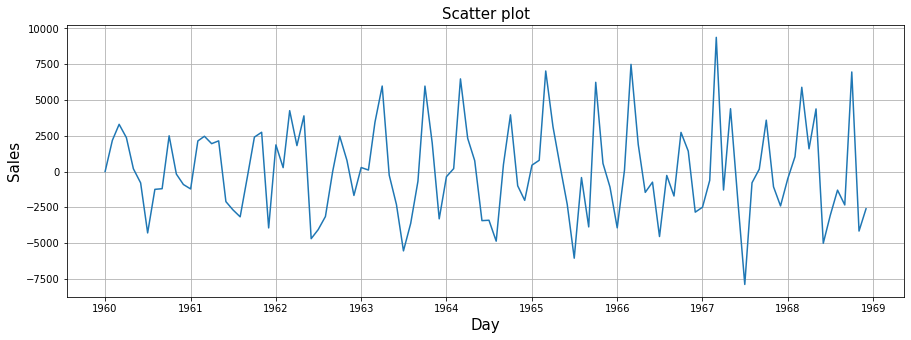

In [239]:
#lets plot Stationary Data
plt.figure(figsize = (15,5))
plt.plot(series)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.title("Scatter plot", fontsize=15)
plt.grid()

# Finding the p (pacf plot) and q (acf plot) value.

In [240]:
# for q-value
from statsmodels.graphics.tsaplots import plot_acf
# for p-value
from statsmodels.graphics.tsaplots import plot_pacf

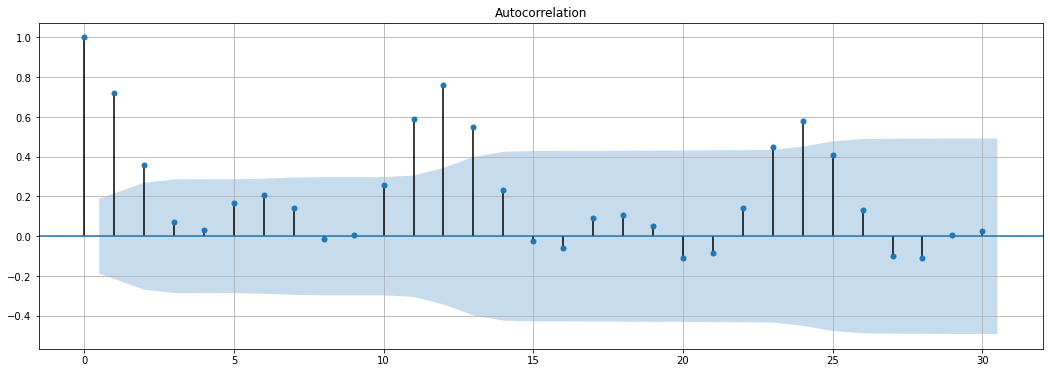

In [241]:
plot_acf(df_4["Sales"], lags = 30)
plt.grid()

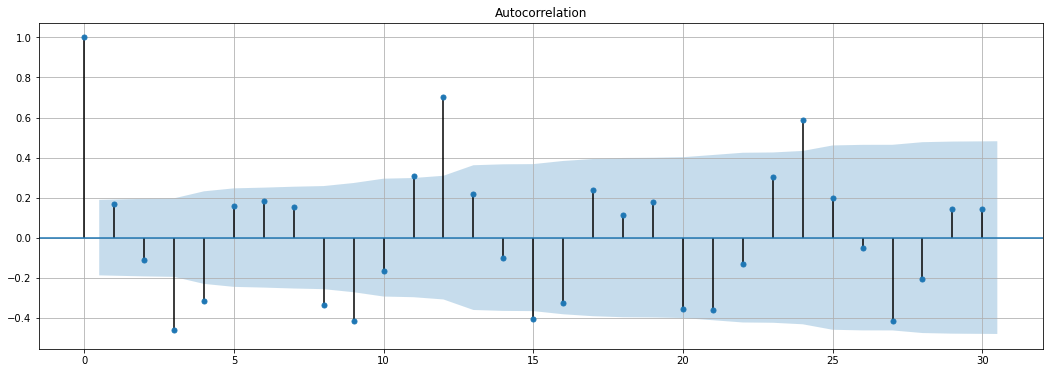

In [242]:
# checking for Stationary Data.
plot_acf(df_4["Sales"].diff().fillna(0), lags = 30)
plt.grid()

# Insights acf plot : check the first Combination of blue circle which is outside the Blue Color Area.
At Starting there are 2 value outside the blue area so try for q=2.<br>
first check for q=2 and pick low RMSE.

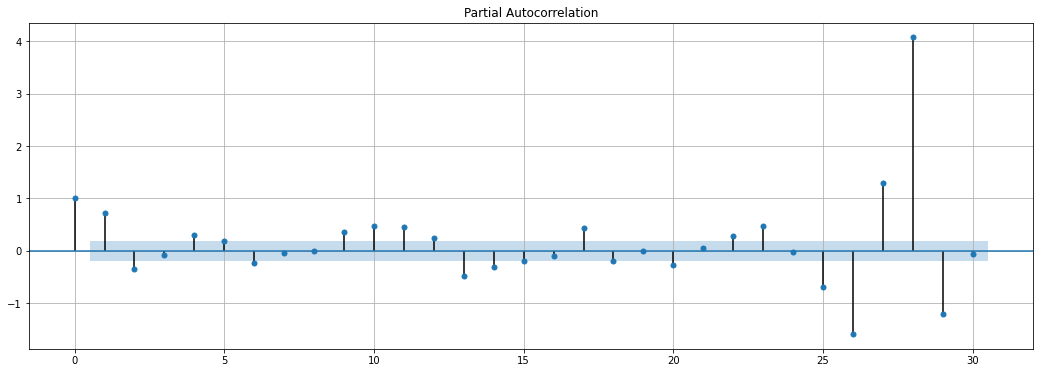

In [243]:
plot_pacf(df_4["Sales"], lags = 30)
plt.grid()

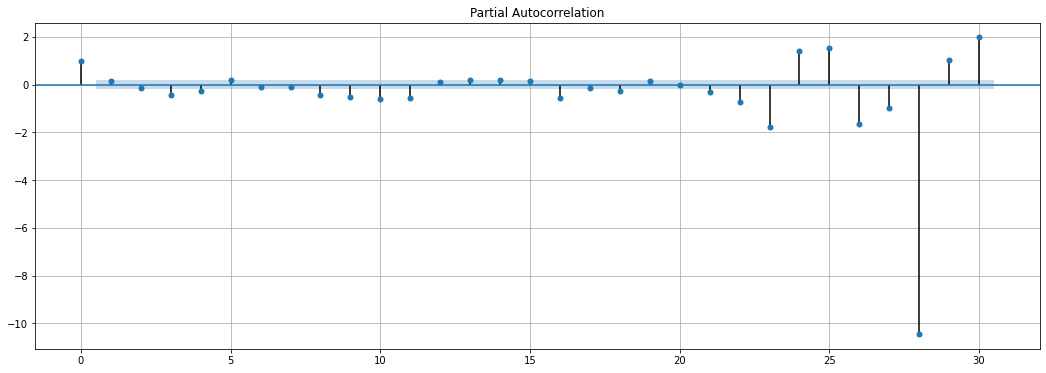

In [244]:
plot_pacf(df_4["Sales"].diff().fillna(0), lags = 30)
plt.grid()

# Insights pacf : p value can be 2.

# Model - 7 :ARIMA :  After getting possible p,d,q value.
p = 2 <br>
d = 1 <br>
q = 2 <br>

In [245]:
test_7 = test.copy()
arima = ARIMA(train["Sales"], order=(2,1,2))
arima = arima.fit()
test_7["ARIMA"] = arima.forecast(steps = len(test))[0]

In [246]:
# Checking for the error-confidence intervel
test_7["Lower ARIMA"] = arima.forecast(steps = len(test))[2][:,0]   # 5% error and 95% confidence interval
test_7["Upper ARIMA"] = arima.forecast(steps = len(test))[2][:,1]
test_7["Lower 50"] = arima.forecast(steps = len(test),alpha=0.5)[2][:,0]   # 50% error and 50% confidence interval
test_7["Upper 50"] = arima.forecast(steps = len(test), alpha=0.5)[2][:,1]
test_7["Lower 80"] = arima.forecast(steps = len(test),alpha=0.20)[2][:,0]     # 20% error and 80% confidence interval
test_7["Upper 80"] = arima.forecast(steps = len(test), alpha=0.20)[2][:,1]

In [247]:
test_7.head()

,Sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error,ARIMA,Lower ARIMA,Upper ARIMA,Lower 50,Upper 50,Lower 80,Upper 80
Month,,,,,,,,,,,,,,,
1967-07-01,14220.0,18783.333333,4840.269483,23623.602816,13943.063850,14220.0,1.0,1.0,19555.684100,15023.593648,24087.774552,17996.038830,21115.329369,16592.309436,22519.058764
1967-08-01,13434.0,19087.666667,4329.325336,23416.992003,14758.341330,13434.0,1.0,1.0,19270.682488,12862.764688,25678.600287,17065.501724,21475.863251,15080.770248,23460.594727
1967-09-01,13598.0,17856.500000,4715.023383,22571.523383,13141.476617,13598.0,1.0,1.0,21720.066497,13877.837546,29562.295447,19021.290862,24418.842131,16592.308605,26847.824388
1967-10-01,17187.0,17439.000000,4630.130884,22069.130884,12808.869116,17187.0,1.0,1.0,24623.394317,15574.866202,33671.922432,21509.490431,27737.298203,18706.879798,30539.908836
1967-11-01,16119.0,16112.000000,3293.970917,19405.970917,12818.029083,16119.0,1.0,1.0,25245.103193,15132.251966,35357.954420,21764.929807,28725.276580,18632.665197,31857.541189


In [248]:
rmse = sqrt(mean_squared_error(test.Sales, test_7.ARIMA))
print(rmse)

6867.627881854304


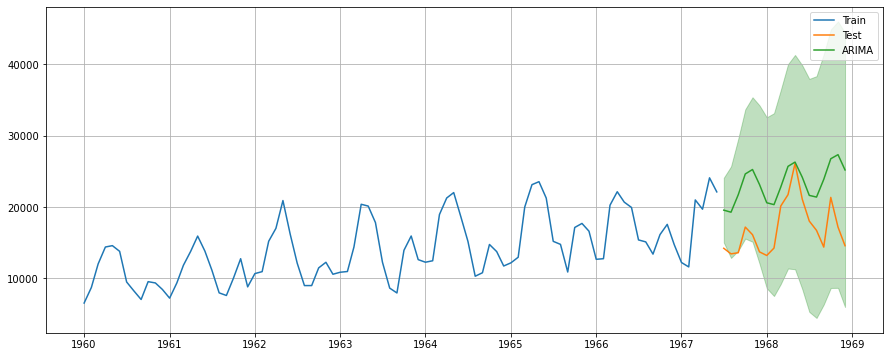

In [249]:
plt.figure(figsize=(15,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test_7['ARIMA'], label='ARIMA')
plt.fill_between(test_7.index, test_7["Lower ARIMA"], test_7["Upper ARIMA"], color='g', alpha=.25)
#plt.fill_between(test_7.index, test_7["Lower 50"], test_7["Upper 50"], color='b', alpha=.25)
#plt.fill_between(test_7.index, test_7["Lower 80"], test_7["Upper 80"], color='y', alpha=.25)
plt.legend(loc='best')
plt.grid()

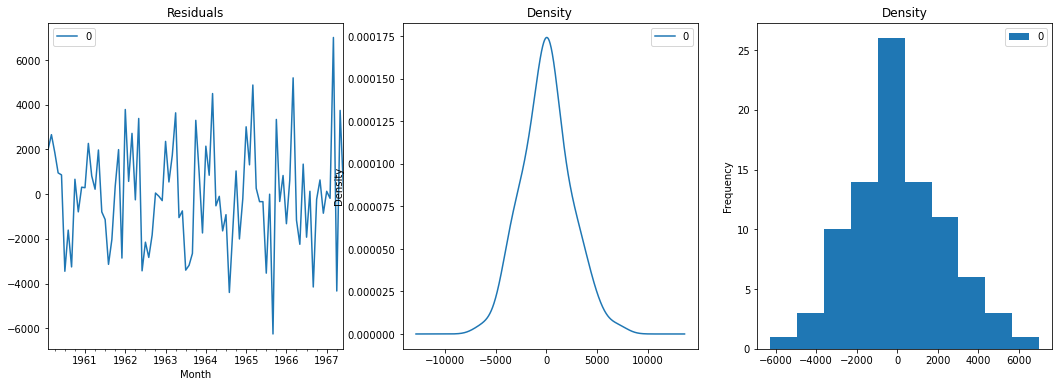

In [250]:
# Plot Residual Error
residuals = pd.DataFrame(arima.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

In [251]:
import itertools

In [252]:
p = q = range(0,2)
d = [1]

# generate all the combination of p,d,q
pdq = list(itertools.product(p,d,q))


In [253]:
pdq

[(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]

In [254]:
order_list = []
rmse_list = []
for param in pdq:
    try:
        mod = ARIMA(train["Sales"], order = param)
        results = mod.fit()
        forecasted_values = results.forecast(steps=len(test))[0] 
        rmse = sqrt(mean_squared_error(test.Sales, forecasted_values))
        print("\nARIMA" + str(param) + "\nRMSE =", round(rmse,2))
        order_list = order_list+ [param]
        rmse_list = rmse_list + [rmse]
    except:
        continue
        


ARIMA(0, 1, 0)
RMSE = 7507.97

ARIMA(0, 1, 1)
RMSE = 6965.09

ARIMA(1, 1, 0)
RMSE = 7034.03


# Insights : Lower RMSE is better of model.

In [255]:
pd.DataFrame(order_list)

,0,1,2
0,0,1,0
1,0,1,1
2,1,1,0


In [256]:
rmse_list

[7507.969943913547, 6965.086377804712, 7034.033487275252]

In [257]:
order_rmse = pd.DataFrame(order_1 for order_1 in itertools.zip_longest(order_list))
order_rmse.columns = ["orders"]
order_rmse["RMSE"] = rmse_list
order_rmse

,orders,RMSE
0,"(0, 1, 0)",7507.969944
1,"(0, 1, 1)",6965.086378
2,"(1, 1, 0)",7034.033487


In [258]:
order_rmse[order_rmse["RMSE"]== order_rmse["RMSE"].min()]

,orders,RMSE
1,"(0, 1, 1)",6965.086378


# Model - 8 : SARIMA
Seasonality (S) + ARIMA = SARIMA<br>
order = (P,d,q)<br>
seasonal_order = (P,D,Q,M)<br>
M = Seasonal

In [259]:
from statsmodels.tsa.api import SARIMAX

In [260]:
test_8 = test.copy()
sarima = SARIMAX(train["Sales"], order = (0,1,1), seasonal_order= (0,1,1,12))
sarima = sarima.fit()
test_8['SARIMA'] = sarima.forecast(steps = len(test))

In [261]:
test_8

,Sales,roll_mean,roll_stdv,rollmean + 1st_stdv,rollmean - 1st_stdv,Trend,Seasonal,Error,SARIMA
Month,,,,,,,,,
1967-07-01,14220.0,18783.333333,4840.269483,23623.602816,13943.063850,14220.0,1.0,1.0,16223.255677
1967-08-01,13434.0,19087.666667,4329.325336,23416.992003,14758.341330,13434.0,1.0,1.0,15252.733512
1967-09-01,13598.0,17856.500000,4715.023383,22571.523383,13141.476617,13598.0,1.0,1.0,13318.230526
1967-10-01,17187.0,17439.000000,4630.130884,22069.130884,12808.869116,17187.0,1.0,1.0,17138.722142
1967-11-01,16119.0,16112.000000,3293.970917,19405.970917,12818.029083,16119.0,1.0,1.0,18132.785554
1967-12-01,13713.0,14711.833333,1563.305398,16275.138731,13148.527936,13713.0,1.0,1.0,15798.473428
1968-01-01,13210.0,14543.500000,1677.093050,16220.593050,12866.406950,13210.0,1.0,1.0,13418.978318
1968-02-01,14251.0,14679.666667,1600.407656,16280.074323,13079.259010,14251.0,1.0,1.0,13173.292337
1968-03-01,20139.0,15769.833333,2619.544267,18389.377600,13150.289066,20139.0,1.0,1.0,21581.028172


In [262]:
 #Checking for the error-confidence intervel
test_8["Lower SARIMA"] = sarima.get_forecast(steps = len(test)).conf_int()["lower Sales"]   # 5% error and 95% confidence interval
test_8["Upper SARIMA"] = sarima.get_forecast(steps = len(test)).conf_int()["upper Sales"]


In [263]:
rmse = sqrt(mean_squared_error(test.Sales, test_8.SARIMA))
print(rmse)

1585.981631968336


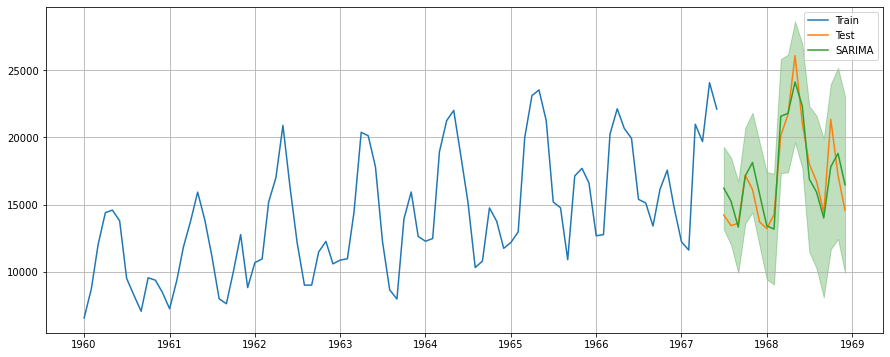

In [264]:
plt.figure(figsize=(15,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test_8['SARIMA'], label='SARIMA')
plt.fill_between(test_8.index, test_8["Lower SARIMA"], test_8["Upper SARIMA"], color='g', alpha=.25)
plt.legend(loc='best')
plt.grid()

# Insights : we can tune this model using for loop same as did in ARIMA model.
watch 12 july monisha mam video time : 2:27.

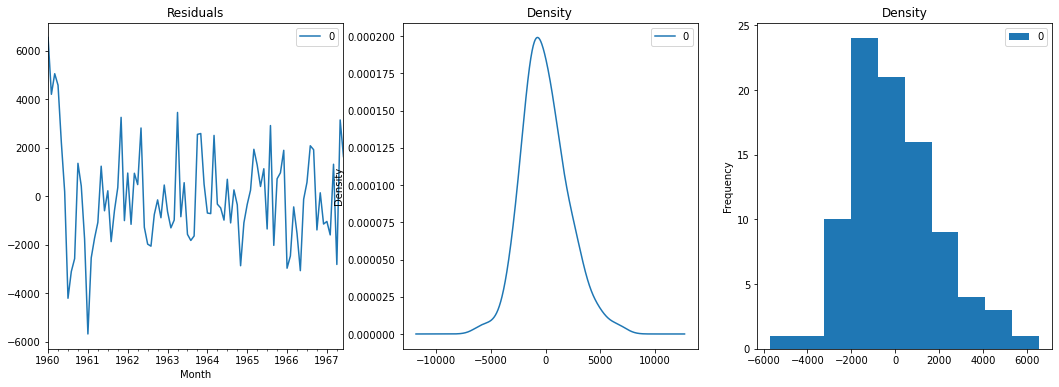

In [265]:
# Plot Residual Error
residuals = pd.DataFrame(sarima.resid)
fig, ax = plt.subplots(1,3)
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind= 'kde', title = "Density", ax=ax[1])
residuals.plot(kind= 'hist', title = "Density", ax=ax[2])

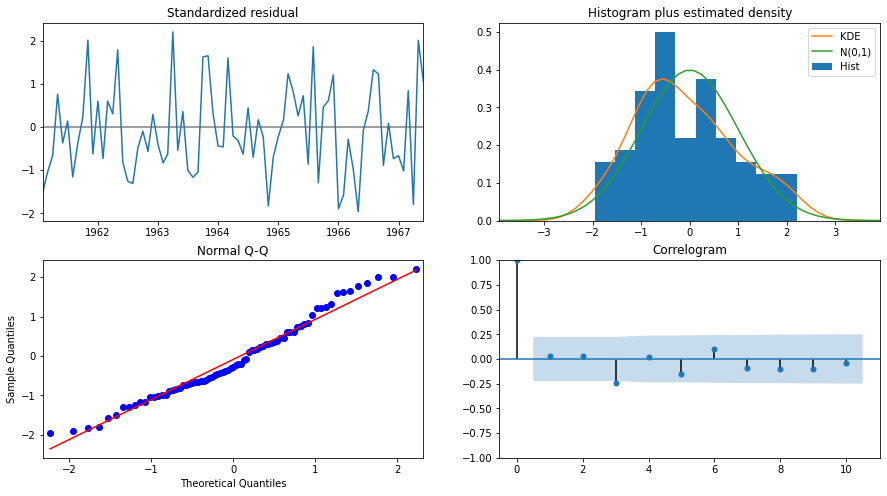

In [269]:
# plot_diagnostics is a default pkg - plot SARIMA Residuals
sarima.plot_diagnostics(figsize=(15,8))
plt.show()

# Insights :
plot-1 : Mean value nearby to 0.<br>
plot-2 : residual(orange line) should look like as green line(normally Dist.).<br>
plot-3 : blue point should be nearby red line.<br> 
plot-4 : blue circle should not outside light blue area otherwise model is not good.<br>

# Conclusion of all the Model
Model is good, which have RMSE Lower Value.

In [268]:
rmse = sqrt(mean_squared_error(test.Sales, test_1.avg))
print("Simple Average \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_2.moving_avg))
print("Moving Average \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_3.SES))
print("Simple Exponential Smoothing \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_4.Holt_linear))
print("Holt Linear \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_5.Holt_Winter))
print("Holt Winter \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_7.ARIMA))
print("ARIMA \nRMSE =",round(rmse,2))

rmse = sqrt(mean_squared_error(test.Sales, test_8.SARIMA))
print("SARIMA \nRMSE =",round(rmse,2))


Simple Average 
RMSE = 4611.71
Moving Average 
RMSE = 3836.13
Simple Exponential Smoothing 
RMSE = 5818.87
Holt Linear 
RMSE = 7341.09
Holt Winter 
RMSE = 1479.23
ARIMA 
RMSE = 6867.63
SARIMA 
RMSE = 1585.98
